### Real estate housing price prediction Project


In [347]:
import pandas as pd

In [348]:
housing = pd.read_excel("housing_data.xlsx")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [349]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [350]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

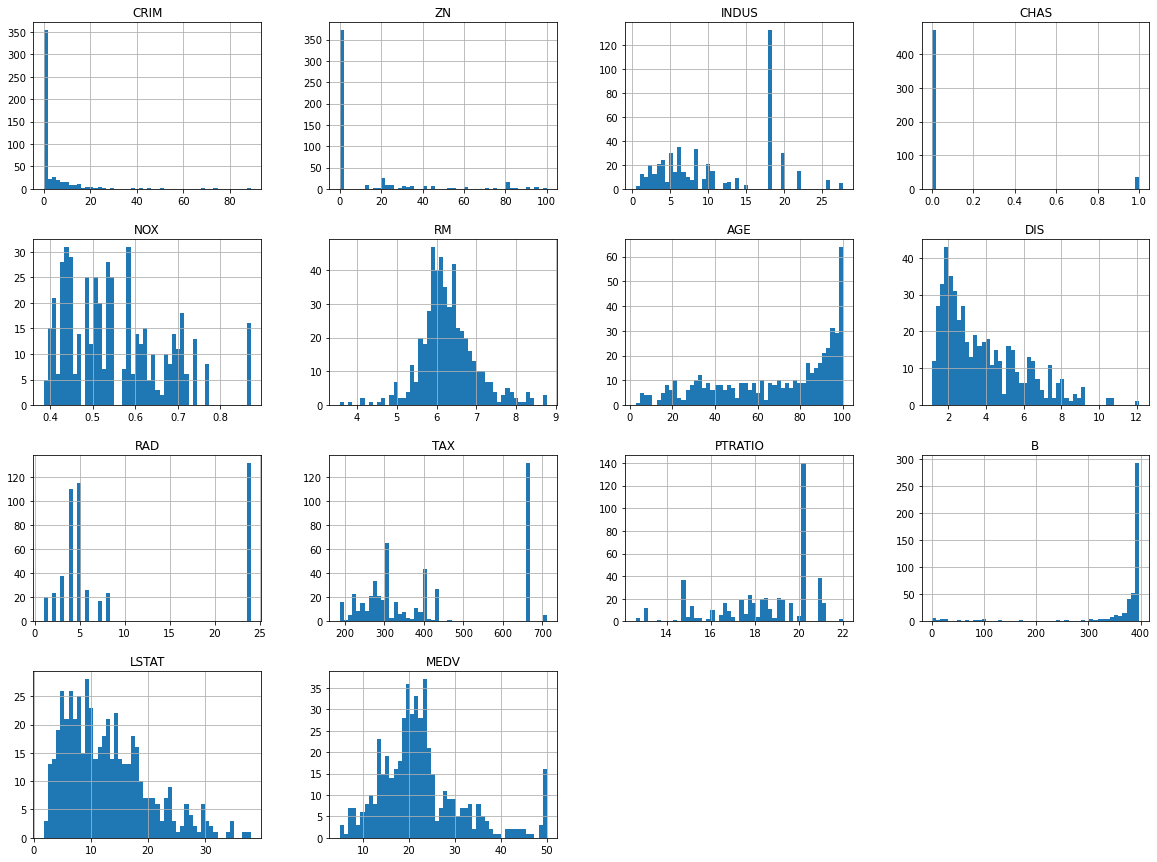

In [351]:
import matplotlib.pyplot as plt 
housing.hist(bins=50,figsize=(20,15))

### Train test split by custom function

In [352]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing,0.2)

In [353]:
print(f"Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set:405
Rows in test set: 101


### Train test split by sklearn

In [354]:
from sklearn.model_selection import  train_test_split

train_set,test_set = train_test_split(housing,test_size=0.2,random_state = 42)
print(f"Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set:404
Rows in test set: 102


#### To get a specefic feature that could play a vital role in prediction so we are going to predict

In [355]:
from sklearn.model_selection import  StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["CHAS"]):
    stratified_train_set = housing.loc[train_index]
    stratified_test_set = housing.loc[test_index]




In [356]:
stratified_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [357]:
#stratified_test_set.describe()
stratified_train_set.info()

#comment out one of above to see the result of each one 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [358]:
stratified_test_set.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [359]:
stratified_test_set["CHAS"].value_counts()


0    95
1     7
Name: CHAS, dtype: int64

In [360]:
stratified_train_set["CHAS"].value_counts()


0    376
1     28
Name: CHAS, dtype: int64

#### To check the ratio of both test and train set


In [361]:
#For train set
print(f"this is the ratio of train set :", 376/28)


this is the ratio of train set : 13.428571428571429


In [362]:

#for test set
print(f"this is the ratio of test set :", 95/7)


this is the ratio of test set : 13.571428571428571


#### To check the co-relation among features and label(MEDV)

In [363]:
co_relation = housing.corr()
co_relation["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

#### For Positive features

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='B', ylabel='MEDV'>,
        <AxesSubplot:xlabel='DIS', ylabel='MEDV'>,
        <AxesSubplot:xlabel='CHAS', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='B', ylabel='RM'>,
        <AxesSubplot:xlabel='DIS', ylabel='RM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='B', ylabel='ZN'>,
        <AxesSubplot:xlabel='DIS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='B'>,
        <AxesSubplot:xlabel='RM', ylabel='B'>,
        <Axes

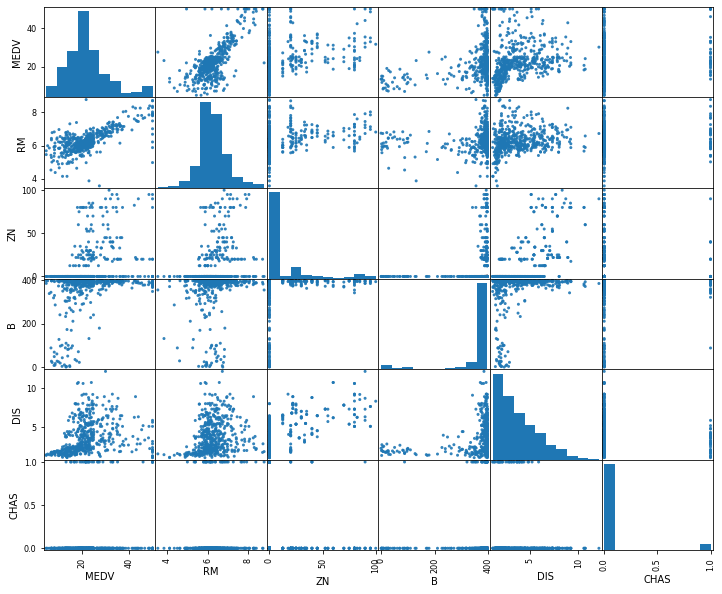

In [364]:
from pandas.plotting import  scatter_matrix
features = ["MEDV","RM","ZN","B","DIS","CHAS"]
scatter_matrix(housing[features],figsize = (12,10), alpha=0.9)

### For Negative features

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='AGE', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RAD', ylabel='MEDV'>,
        <AxesSubplot:xlabel='CRIM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='NOX', ylabel='MEDV'>,
        <AxesSubplot:xlabel='TAX', ylabel='MEDV'>,
        <AxesSubplot:xlabel='INDUS', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='RAD', ylabel='AGE'>,
        <AxesSubplot:xlabel='CRIM', ylabel='AGE'>,
        <AxesSubplot:xlabel='NOX', ylabel='AGE'>,
        <AxesSubplot:xlabel='TAX', ylabel='AGE'>,
        <AxesSubplot:xlabel='INDUS', ylabel='AGE'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='AGE'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='AGE'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RAD'>,
        <AxesSubpl

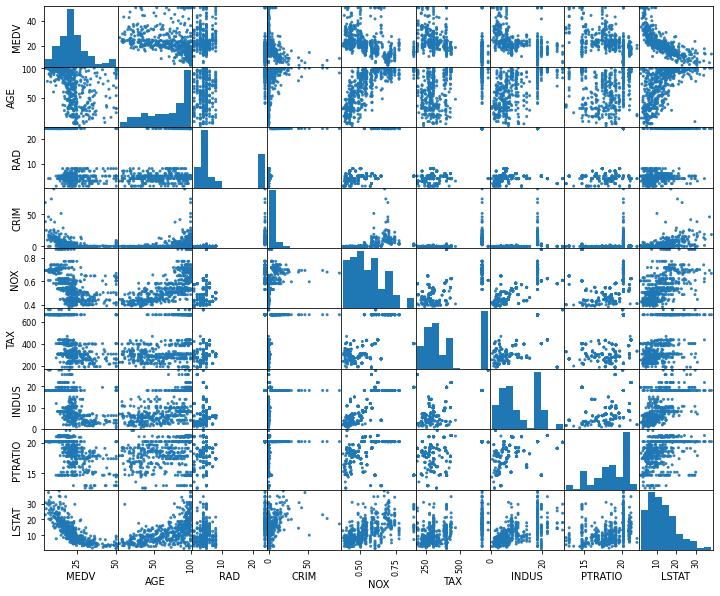

In [365]:
features = ["MEDV","AGE","RAD","CRIM","NOX","TAX","INDUS","PTRATIO","LSTAT"]
scatter_matrix(housing[features],figsize = (12,10),alpha=0.9)

#### For individual features vs Label 

This is the strongest positive correlation between feature(RM) and label(MEDV).


0.6953599470715401

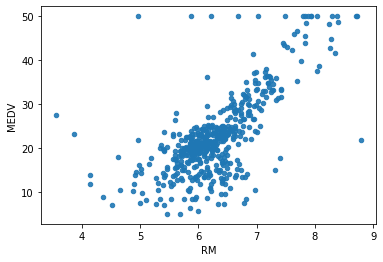

In [366]:
housing.plot(kind="scatter", x = "RM", y = "MEDV", alpha = 0.9)
print("This is the strongest positive correlation between feature(RM) and label(MEDV).")
co_relation = housing.corr()
co_relation["MEDV"]["RM"]

This is the strongest negative correlation between feature(LSTAT) and label(MEDV).


-0.7376627261740145

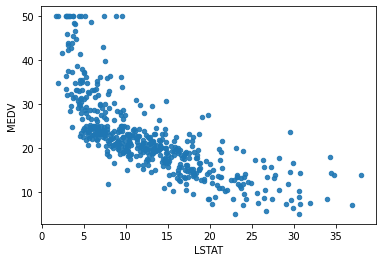

In [367]:
housing.plot(kind="scatter", x = "LSTAT", y = "MEDV", alpha = 0.9)
print("This is the strongest negative correlation between feature(LSTAT) and label(MEDV).")
co_relation = housing.corr()
co_relation["MEDV"]["LSTAT"]

### Separating feature and label


In [368]:
housing = stratified_train_set.drop("MEDV", axis=1)
label = stratified_train_set["MEDV"].copy()


### If you got missing values in your features then there is 3 option to deal with them
#####  1.dropna (so that you'll get rid of missing value in a specific mention column)
#####  2.drop (so that you'll get rid of whole column that has missing value in a specific mention column)
#####  3.fillna (so that first you have to get the median of specfic column then use the fillna method to put calculted value in a missing cell of the specific column. )


In [369]:
# # option 1
# a = housing.dropna(subset=[AGE])
# a

# option 2
# housing.drop("AGE", axis=1)

# option 3
#  median = housing["AGE"].median()
#  housing["AGE"].fillna(median)

### Dealing with 'nan' by imputer

In [370]:
# SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder. 
# It is implemented by the use of the SimpleImputer() method which takes the following arguments :
 

# missing_values : The missing_values placeholder which has to be imputed. By default is NaN 
# strategy : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’. 
# fill_value : The constant value to be given to the NaN data using the constant strategy. 
 

In [371]:
from sklearn.impute import SimpleImputer
imputing =  SimpleImputer(strategy="median")
imputing.fit(housing)

SimpleImputer(strategy='median')

In [372]:
imputing.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [373]:
X = imputing.transform(housing)
housing_tranform = pd.DataFrame(X,columns=housing.columns)
housing_tranform.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


### About scikit-learn

Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and Matplotlib!

The functionality that scikit-learn provides include:

Regression, including Linear and Logistic Regression
Classification, including K-Nearest Neighbors
Clustering, including K-Means and K-Means++
Model selection
Preprocessing, including Min-Max Normalizat

It cover 3 main contributions

1.Estimator e.g imputer (fit and transform method)

2.Predictor e.g LinerResgression (fit(),predict(),score())

3.Transformer e.g fit_tranform()

also cover serialization,pipeline etc

### Feature Scalling
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.
Techniques to perform Feature Scaling
Consider the two most important ones:
 
 1. min-max mathod(normalization) This technique re-scales a feature or observation value with distribution value between 0 and 1
 
 formula :X_new = (value - min) / (max - min) result will be between 0 to 1
 it is done by "MinMaxScaler" provide by scikit learn

 2. standardization mathod :It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.
 
 formula : X_new = (value - mean) / (standard deviation)

 it is done by the use of "StandardScaler" provided by scikit-learn

 #### So these two method will be used in our pipeline

In [374]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import  StandardScaler



### creating pipeline

In [375]:

our_pipeline = Pipeline([
    ('imputing', SimpleImputer(strategy = "median")),
    ('std_scaler',StandardScaler()),
    # we can add other method too in our pipeline 
])

In [376]:
housing_in_pipeline = our_pipeline.fit_transform(housing_tranform)
housing_in_pipeline

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

#### selecting and fitting of model

In [377]:
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()


model.fit(housing_in_pipeline,label)


RandomForestRegressor()

In [378]:
data_prepared = our_pipeline.transform(n_feature)

#### Predicticted values

In [379]:
model.predict(data_prepared[:10])

array([22.508, 25.587, 16.363, 23.376, 23.391, 16.835, 24.369, 26.398,
       10.177, 31.906])

#### Actual Values 

In [380]:
list(label[:10]) 

[21.9, 24.5, 16.7, 23.1, 23.0, 17.2, 24.4, 27.5, 9.5, 31.6]

#### Now we are going to find the MSE(mean_squared_error) so that we can evaluate the model

In [381]:
# #this will give the value in output if we set our model as linearregression()
# from sklearn.metrics import  mean_squared_error
# prediction = model.predict(housing_in_pipeline)
# mse = mean_squared_error(label,prediction)
# rmse = np.sqrt(mse)
 
# rmse



so we can try another models  too to minimize the error

### Checking Coss Validation

In [382]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, housing_in_pipeline,label,scoring = "neg_mean_squared_error",cv=10)

rmse_score = np.sqrt(-(score))
rmse_score

array([2.79289168, 2.69441597, 4.40018895, 2.56972379, 3.33073436,
       2.62687167, 4.77007351, 3.27403209, 3.38378214, 3.16691711])

#### checking scores

In [383]:
def scores_are(score):
    print("Score :", score)
    print("Mean :", score.mean())
    print("Standard Deviation :", score.std())

scores_are(rmse_score)




Score : [2.79289168 2.69441597 4.40018895 2.56972379 3.33073436 2.62687167
 4.77007351 3.27403209 3.38378214 3.16691711]
Mean : 3.3009631251857217
Standard Deviation : 0.7076841067486248


### Model Outputs :

1. Decisin Tree

    Mean : 4.3163019620498755
    
    Standard Deviation : 0.9284718269177623

2. Linear Regression

    Mean : 5.030437102767305
    
    Standard Deviation : 1.0607661158294828


3. Rnadom Forest Resgression

    Mean : 3.3047262619190496
    
    Standard Deviation : 0.694305704706087


   


### Saving the model

In [384]:
from joblib import dump,load
dump(model, 'Real_estates.joblib')

['Real_estates.joblib']

### Testing the model

In [385]:
x_test = stratified_test_set.drop("MEDV", axis=1)
y_test = stratified_test_set["MEDV"].copy()

x_test_prepared = our_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

2.948844070638726

## Model Usage ,if we use anothoter notebook 

In [386]:
#first load the file or project
from joblib import dump,load
model=load('Real_estates.joblib')

In [387]:
data_prepared[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [388]:
feature = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(feature)

array([22.508])

#### __________________________________we got _________________________________________